<a href="https://colab.research.google.com/github/Levelearn/data-analysis/blob/main/comparison_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_rel, wilcoxon

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path_before = '/content/drive/MyDrive/Levelearn/dataset_before.csv'
file_path_after = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'

# Memuat dataset "before gamification" dan "after gamification"
after = pd.read_csv(file_path_after, encoding="latin-1", sep=";")
before  = pd.read_csv(file_path_before, encoding="latin-1", sep=";")

In [ ]:
aspek = ['Happiness', 'Engagement', 'Adoption', 'Retention', 'TaskSuccess']
likert_columns = [col for col in before.columns if any(a in col for a in aspek)]

before_data = before[likert_columns]
after_data = after[likert_columns]

results = []

In [ ]:
for col in likert_columns:
    before_col = before_data[col]
    after_col = after_data[col]

    # Uji normalitas
    stat_before, p_before = shapiro(before_col)
    stat_after, p_after = shapiro(after_col)

    is_normal = p_before > 0.05 and p_after > 0.05

    if is_normal:
        stat, p = ttest_rel(before_col, after_col)
        test_used = "Paired t-test"
    else:
        stat, p = wilcoxon(before_col, after_col)
        test_used = "Wilcoxon test"

    results.append({
        "Kolom": col,
        "Normal (Before)": p_before > 0.05,
        "Normal (After)": p_after > 0.05,
        "Test Digunakan": test_used,
        "p-value": round(p, 4),
        "Kesimpulan": "Signifikan" if p < 0.05 else "Tidak Signifikan"
    })

hasil_df = pd.DataFrame(results)
display(hasil_df)

,Kolom,Normal (Before),Normal (After),Test Digunakan,p-value,Kesimpulan
0,Happiness_Q1,False,False,Wilcoxon test,0.0000,Signifikan
1,Happiness_Q2,False,False,Wilcoxon test,0.0000,Signifikan
2,Happiness_Q3,False,False,Wilcoxon test,0.4771,Tidak Signifikan
3,Happiness_Q4,False,False,Wilcoxon test,0.0000,Signifikan
4,Happiness_Q5,False,False,Wilcoxon test,0.0004,Signifikan
5,Engagement_Q1,False,False,Wilcoxon test,0.0604,Tidak Signifikan
6,Engagement_Q2,False,False,Wilcoxon test,0.0035,Signifikan
7,Engagement_Q3,False,False,Wilcoxon test,0.0000,Signifikan
8,Engagement_Q4,False,False,Wilcoxon test,0.0004,Signifikan
9,Engagement_Q5,False,False,Wilcoxon test,NaN,Tidak Signifikan


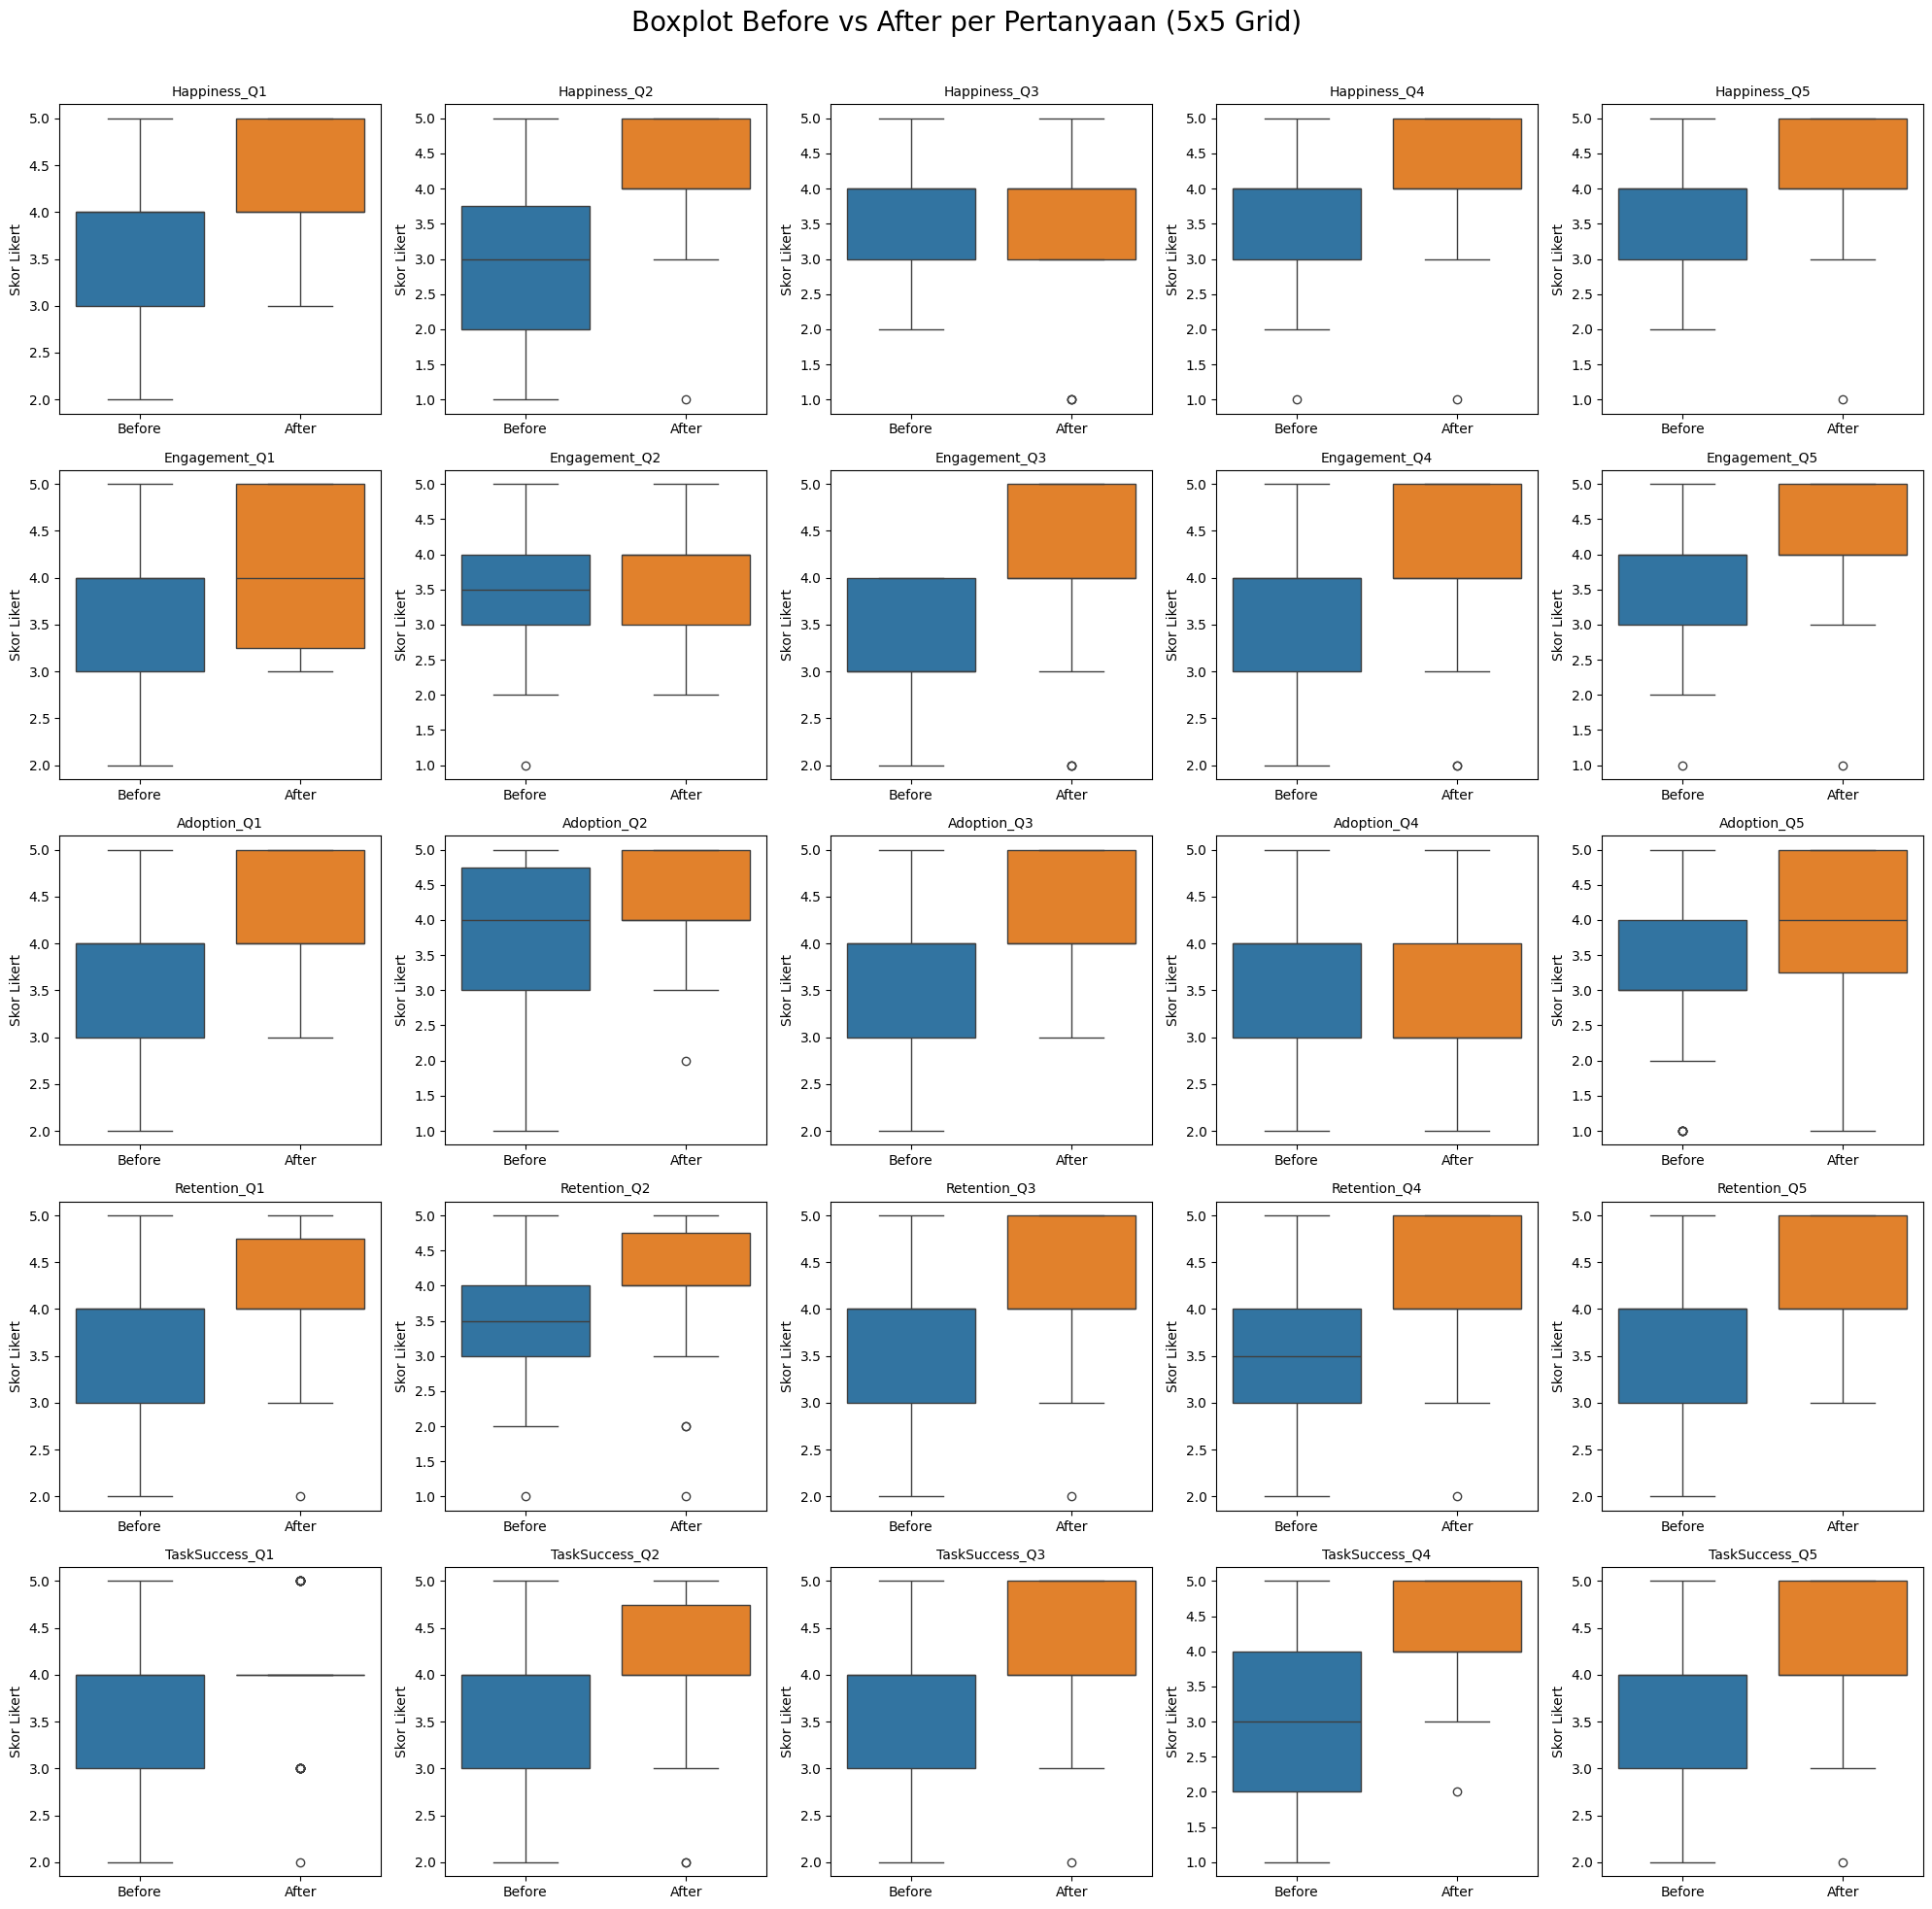

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle("Boxplot Before vs After per Pertanyaan (5x5 Grid)", fontsize=20)

for idx, col in enumerate(likert_columns):
    row = idx // 5
    col_pos = idx % 5
    ax = axes[row, col_pos]

    sns.boxplot(data=pd.DataFrame({
        "Before": before_data[col],
        "After": after_data[col]
    }), ax=ax)

    ax.set_title(col, fontsize=10)
    ax.set_ylabel("Skor Likert")
    ax.set_xlabel("")

# Hapus subplot kosong jika jumlah kolom < 25
if len(likert_columns) < 25:
    for i in range(len(likert_columns), 25):
        fig.delaxes(axes[i // 5, i % 5])

plt.tight_layout(rect=[0, 0, 1, 0.97])  # supaya title tidak ketindih
plt.show()

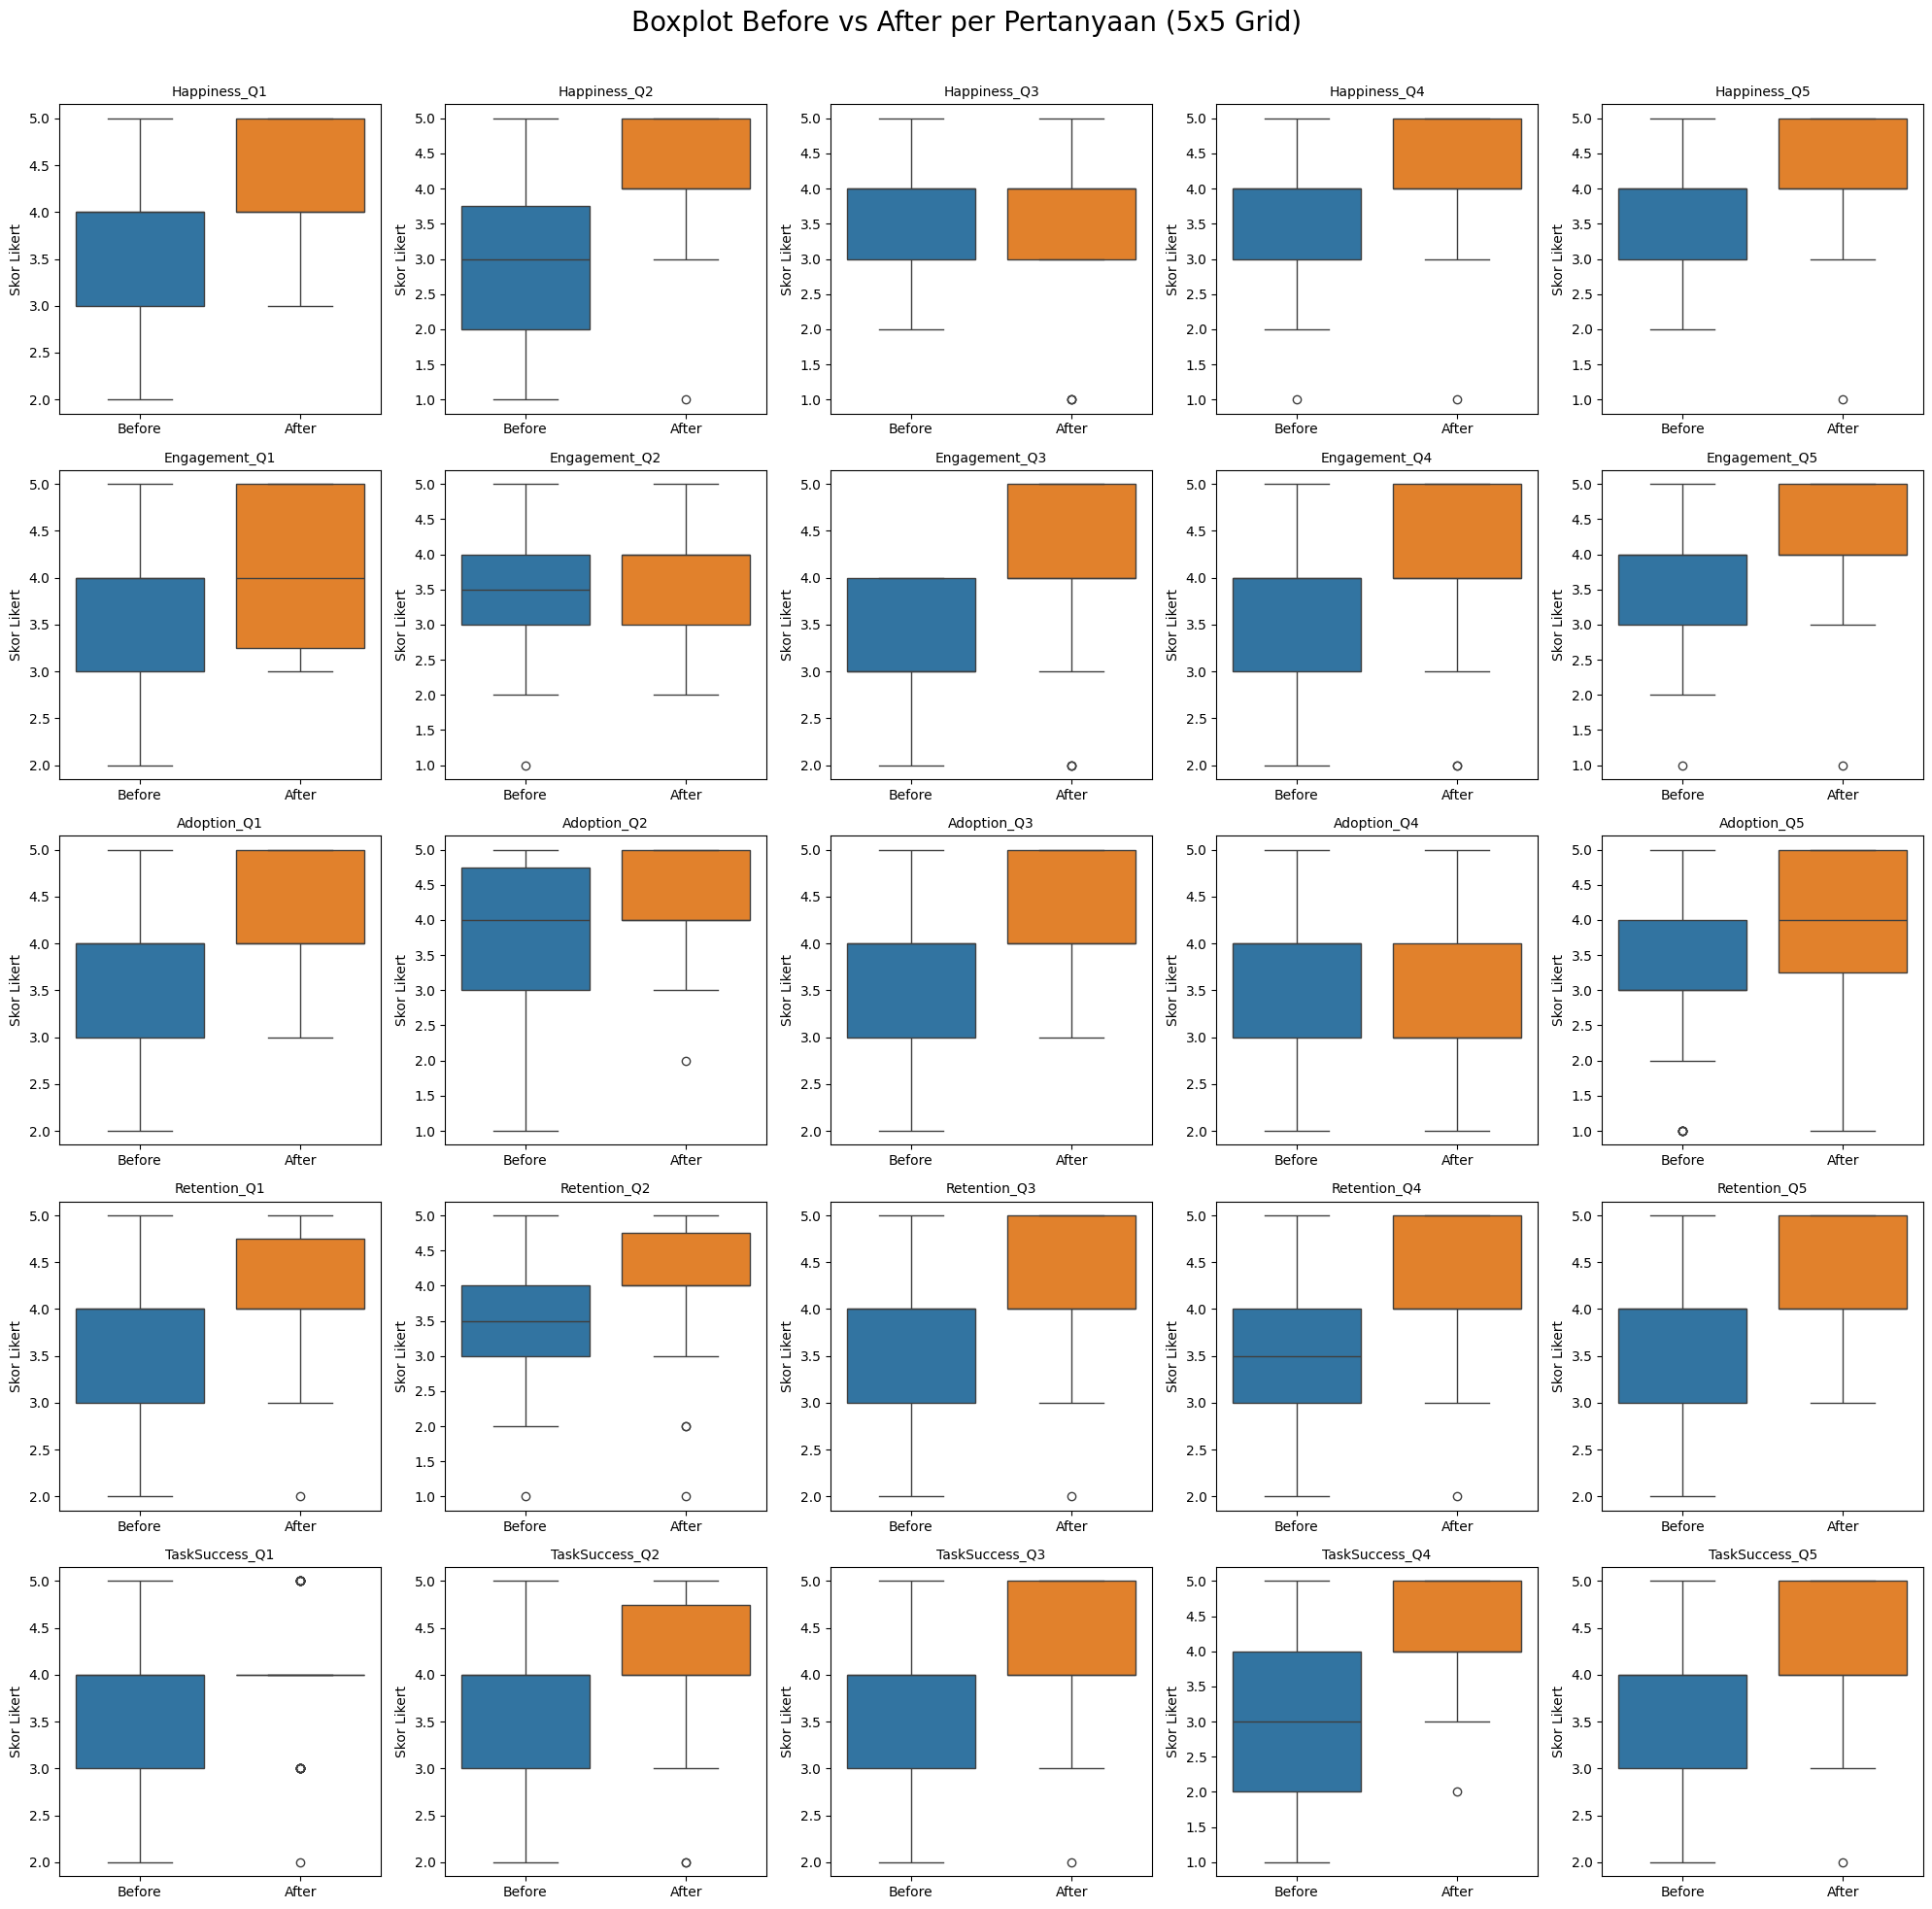

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle("Boxplot Before vs After per Pertanyaan (5x5 Grid)", fontsize=20)

for idx, col in enumerate(likert_columns):
    row = idx // 5
    col_pos = idx % 5
    ax = axes[row, col_pos]

    sns.boxplot(data=pd.DataFrame({
        "Before": before_data[col],
        "After": after_data[col]
    }), ax=ax)

    ax.set_title(col, fontsize=10)
    ax.set_ylabel("Skor Likert")
    ax.set_xlabel("")

# Hapus subplot kosong jika jumlah kolom < 25
if len(likert_columns) < 25:
    for i in range(len(likert_columns), 25):
        fig.delaxes(axes[i // 5, i % 5])

plt.tight_layout(rect=[0, 0, 1, 0.97])  # supaya title tidak ketindih
plt.show()

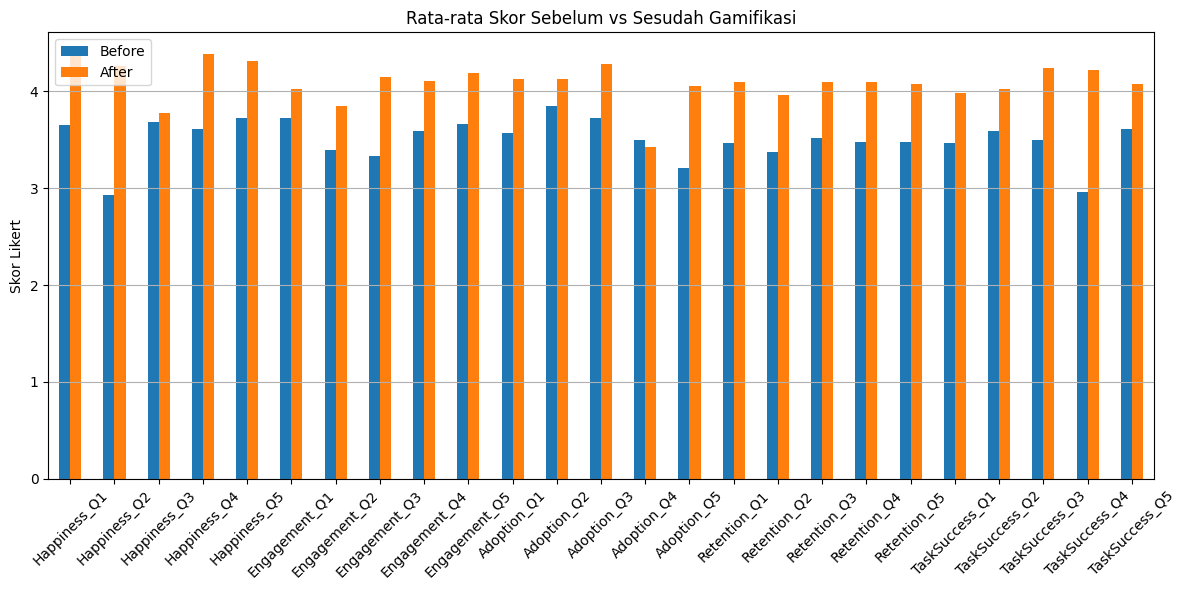

In [ ]:
avg_before = before_data.mean()
avg_after = after_data.mean()

avg_df = pd.DataFrame({
    "Before": avg_before,
    "After": avg_after
})

avg_df.plot(kind="bar", figsize=(12,6))
plt.title("Rata-rata Skor Sebelum vs Sesudah Gamifikasi")
plt.ylabel("Skor Likert")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()